In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from IPython.display import clear_output
import matplotlib.pyplot as plt

# PRUEBAS MODELO ENTRENADO

## Definición de funciones utiles

In [2]:
def normalize(input_image):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_image = tf.image.resize(input_image, (IMG_HEIGHT, IMG_WIDTH))
  

  return input_image

In [3]:
def _parse_function(filename):
    image_string = tf.io.read_file (filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.cast(image_decoded, tf.float32)

    return image

In [4]:
def display(display_list, classification):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i]+ "  classification "+str(classification[i]))
    img=tf.keras.utils.array_to_img(display_list[i])
    plt.imshow(img)
    plt.axis('off')
  plt.show()

## Creación Dataset

In [5]:
dataset_directory ="train/"
df1 = pd.read_csv(dataset_directory+"data.csv")
df1.head(2)

timestamp kiwibot_id                     gps_point  \
0  2022-01-20 01:00:53.551000+00:00      4A009  POINT(-118.416716 33.972067)   
1  2022-01-20 01:01:30.184000+00:00      4A009  POINT(-118.416908 33.972258)   

          lon        lat      roll     pitch       yaw  linear_speed  \
0 -118.416716  33.972067 -0.032725 -0.104720 -0.848666      0.161365   
1 -118.416908  33.972258  0.063268 -0.076358 -2.261292      1.054795   

   angular_speed                                     image_path  \
0       0.000000  6594-camera_color_image_raw-1642640453551.jpg   
1       0.092541  9c99-camera_color_image_raw-1642640490184.jpg   

                                          depth_path  image_lvl_label  \
0  6594-camera_aligned_depth_to_color_image_raw-1...              2.0   
1  9c99-camera_aligned_depth_to_color_image_raw-1...              2.0   

                                          label_path  
0  6594-camera_color_image_raw-1642640453551_seg.png  
1  9c99-camera_color_image_raw-1642640490184_seg.png

In [6]:
dataset_directory_2="test/"
df2 = pd.read_csv(dataset_directory_2+"data.csv")
df2 = shuffle(df2).reset_index(drop=True)
print(len(df2))
df2.head(2)

2173


timestamp  kiwibot_id                   gps_point  \
0  2021-07-23 14:50:09.135000+00:00         407  POINT(-80.190036 25.76296)   
1  2021-07-28 14:14:00.051000+00:00         407  POINT(-80.18995 25.763744)   

         lon        lat      roll     pitch       yaw  linear_speed  \
0 -80.190036  25.762960  0.000000  0.000000  0.000000      0.000000   
1 -80.189950  25.763744  0.041452  0.014181 -1.220584      1.453467   

   angular_speed                                     image_path  \
0            0.0  a120-camera_color_image_raw-1627051809136.jpg   
1            0.0  8d35-camera_color_image_raw-1627481640051.jpg   

                                          depth_path  
0  a120-camera_aligned_depth_to_color_image_raw-1...  
1  8d35-camera_aligned_depth_to_color_image_raw-1...

In [7]:
filenames  =list(df2['image_path'].map(lambda  x:dataset_directory_2+x))

In [8]:
dataset_test  =tf.data.Dataset.from_tensor_slices((filenames))

In [9]:
dataset_test = dataset_test.map(_parse_function)

In [10]:
IMG_HEIGHT  =180 #720
IMG_WIDTH = 320#1280
CHANNELS = 3
test_images  =  dataset_test.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_batches = test_images.batch(64)

## Prueba modelo

Se carga el modelo con mejores resultados, imagen con 94% y Acc de 90%

In [11]:
model = tf.keras.models.load_model('saved_model\my_model_mio_94_acc_90')

In [12]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 resizing_3 (Resizing)          (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 128, 128, 10  280         ['resizing_3[0][0]']             
                                )                                                                 
                                                                                            

In [13]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def create_clasification(resul_class):
  resul = tf.argmax(resul_class,axis=-1)
  return resul[0].numpy()

In [14]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image in dataset.take(num):
      pred_mask, resul_clasification = model.predict(image)
      display([image[0], create_mask(pred_mask)],[create_clasification(resul_clasification),create_clasification(resul_clasification)])

2/2 [==============================] - 2s 758ms/step


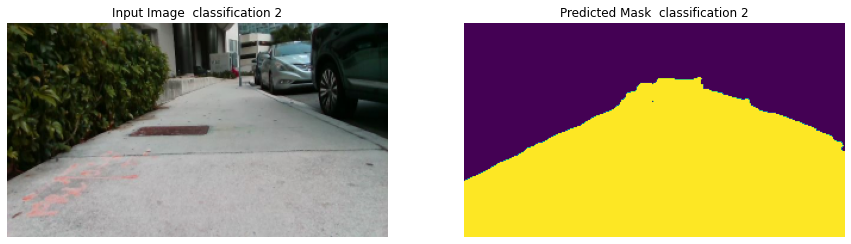

2/2 [==============================] - 1s 737ms/step


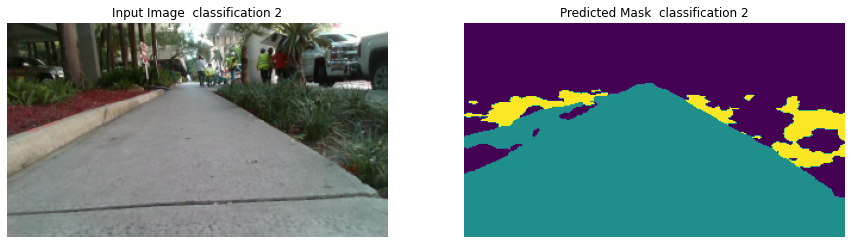

2/2 [==============================] - 1s 712ms/step


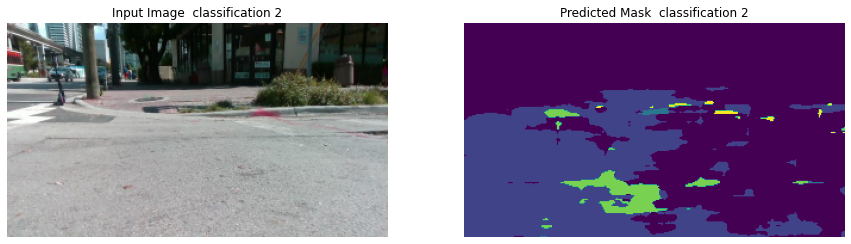

2/2 [==============================] - 1s 716ms/step


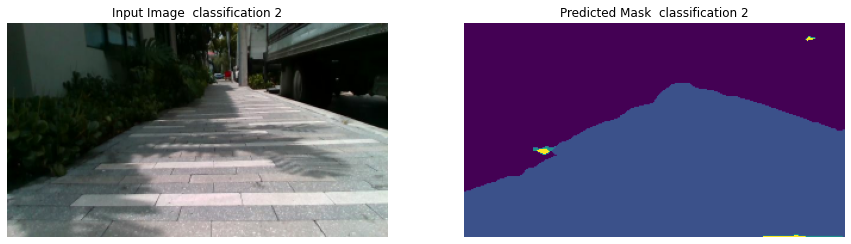

2/2 [==============================] - 1s 669ms/step


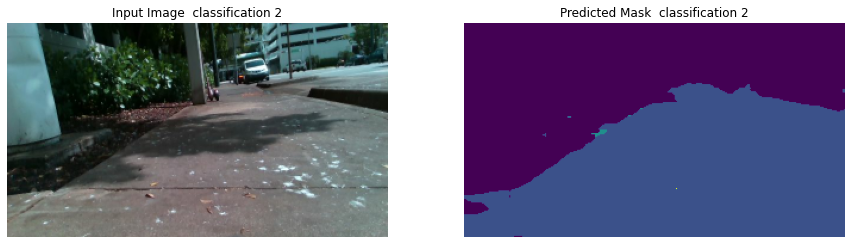

2/2 [==============================] - 1s 771ms/step


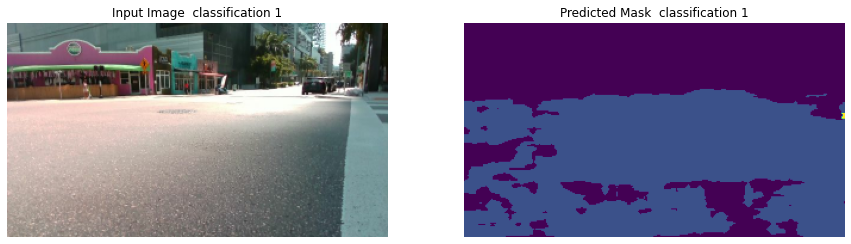

2/2 [==============================] - 1s 731ms/step


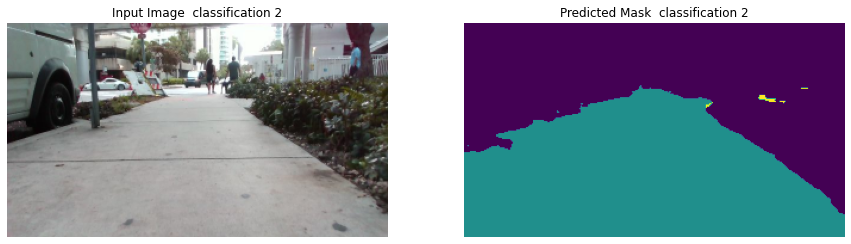

2/2 [==============================] - 1s 684ms/step


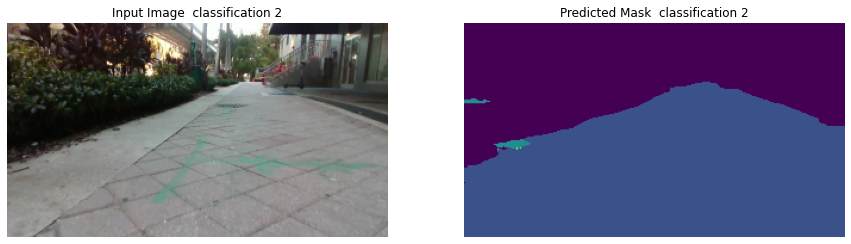

2/2 [==============================] - 1s 761ms/step


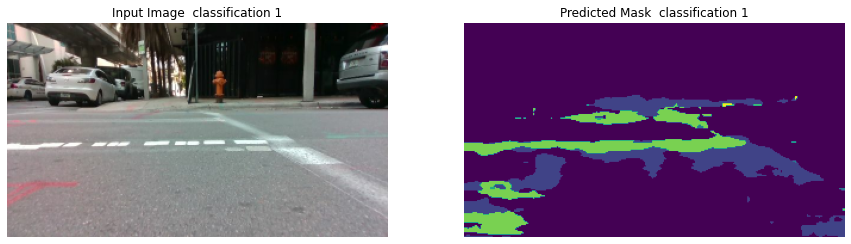

2/2 [==============================] - 1s 687ms/step


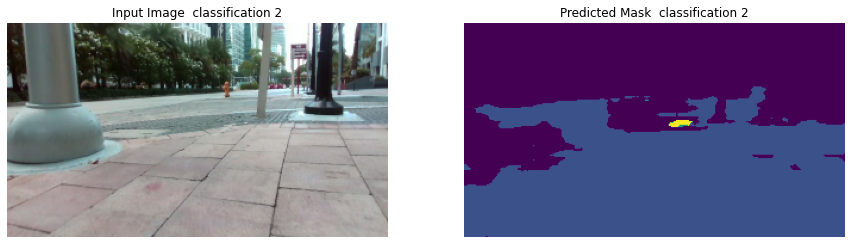

2/2 [==============================] - 1s 670ms/step


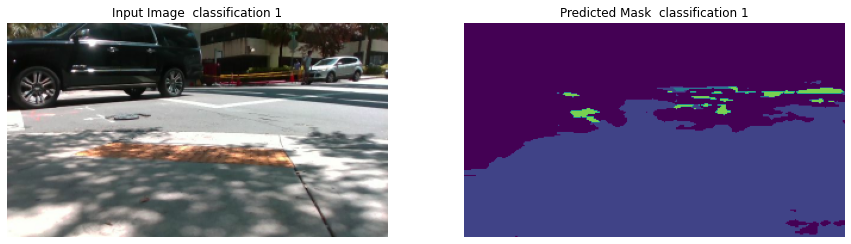

2/2 [==============================] - 1s 694ms/step


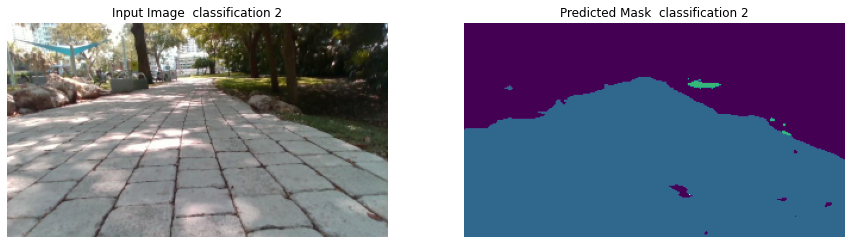

2/2 [==============================] - 1s 694ms/step


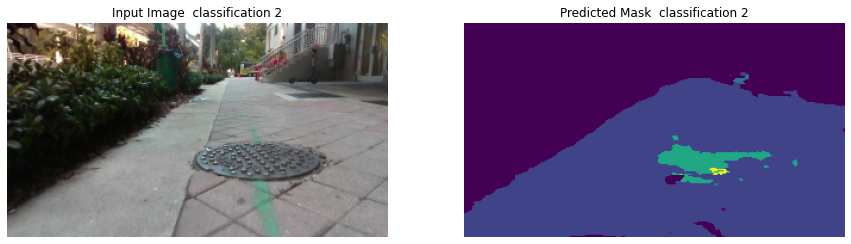

2/2 [==============================] - 1s 680ms/step


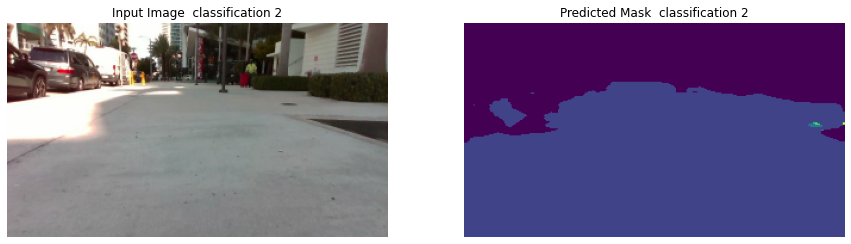

2/2 [==============================] - 1s 702ms/step


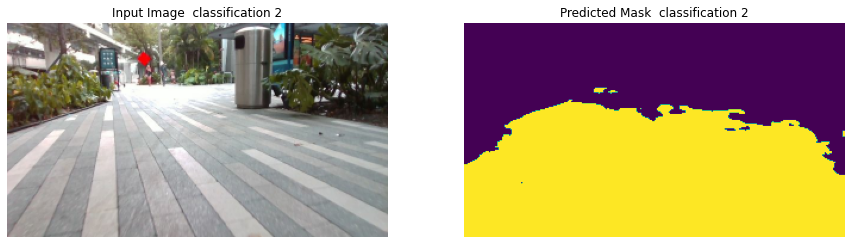

2/2 [==============================] - 1s 675ms/step


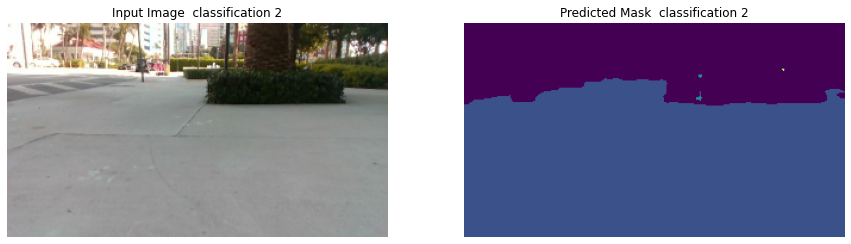

2/2 [==============================] - 1s 676ms/step


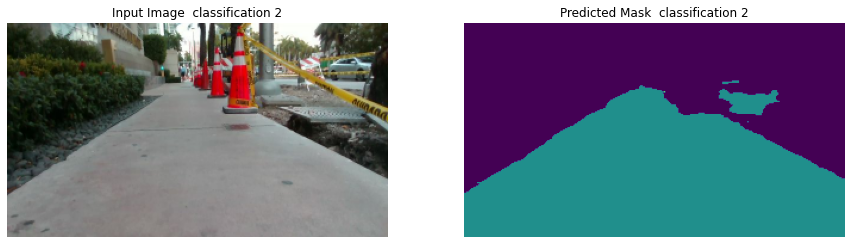

2/2 [==============================] - 1s 725ms/step


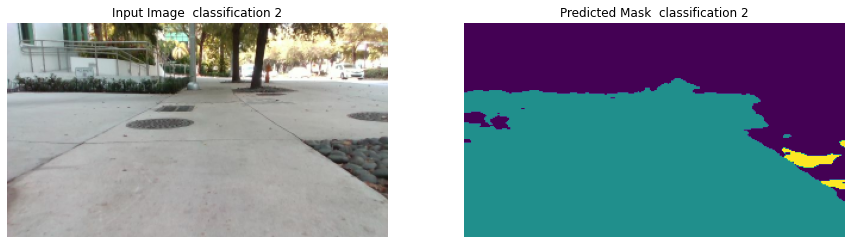

2/2 [==============================] - 1s 661ms/step


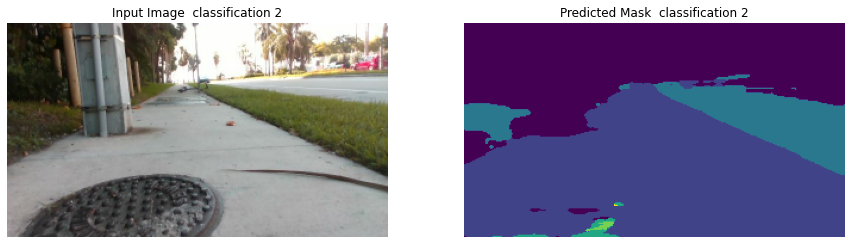

2/2 [==============================] - 1s 676ms/step


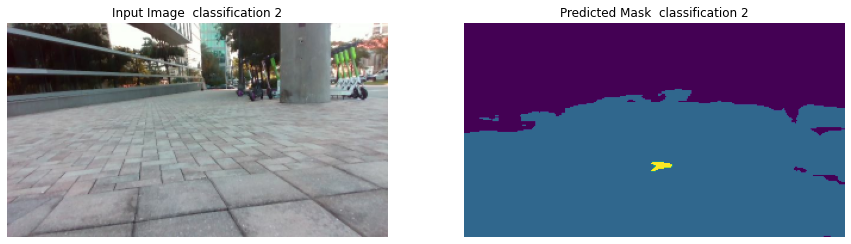

2/2 [==============================] - 1s 665ms/step


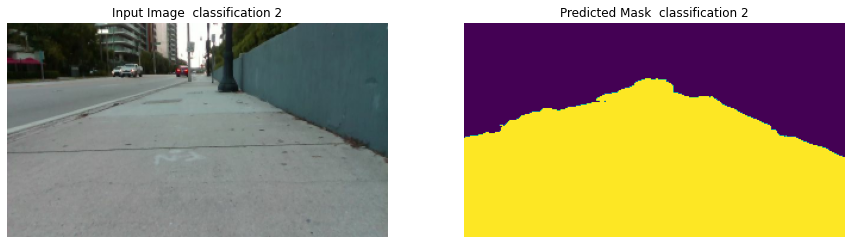

2/2 [==============================] - 1s 668ms/step


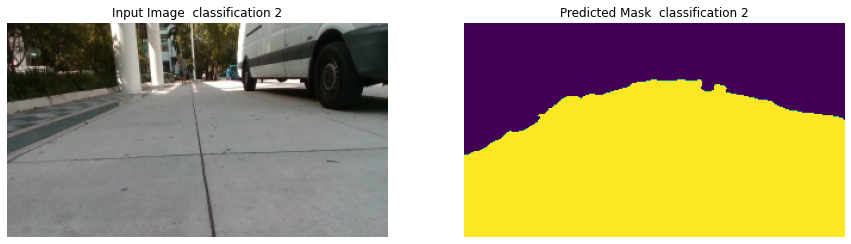

2/2 [==============================] - 1s 679ms/step


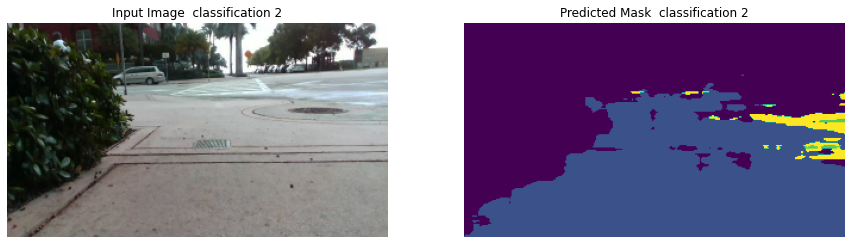

2/2 [==============================] - 1s 698ms/step


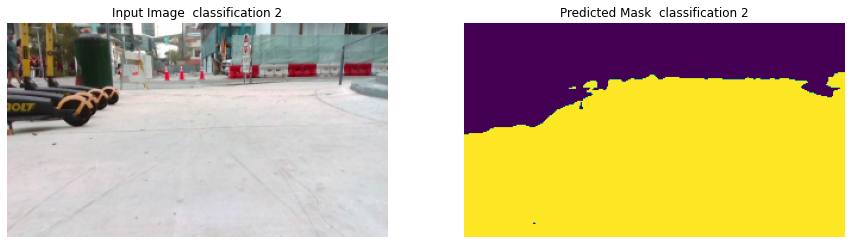

2/2 [==============================] - 1s 667ms/step


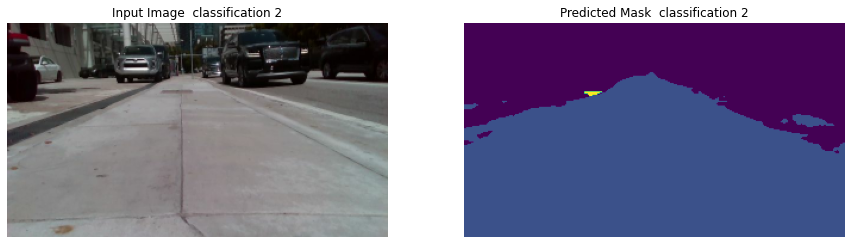

2/2 [==============================] - 1s 710ms/step


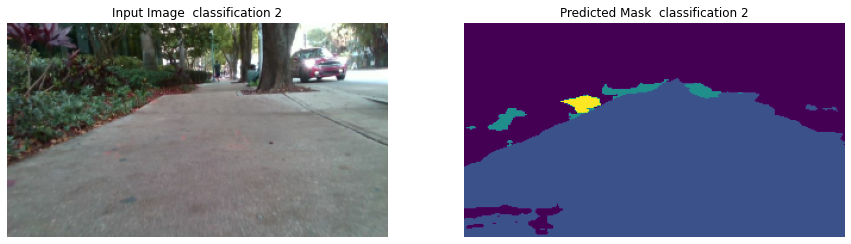

2/2 [==============================] - 1s 701ms/step


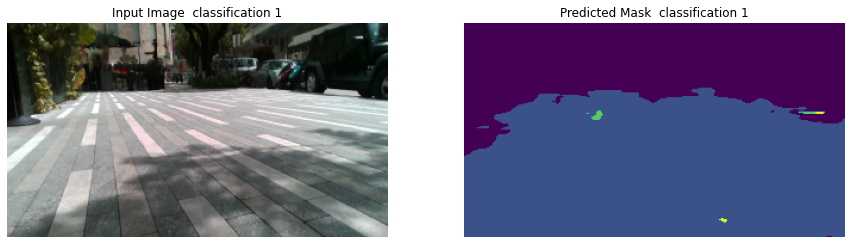

2/2 [==============================] - 1s 677ms/step


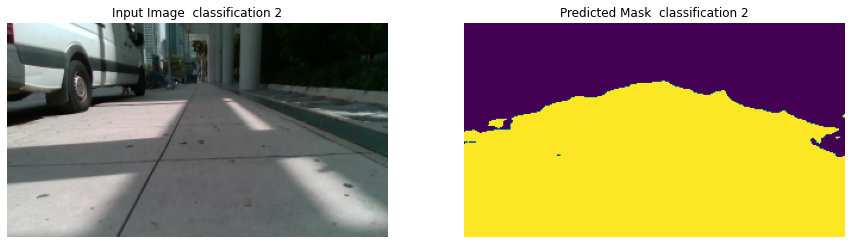

2/2 [==============================] - 1s 738ms/step


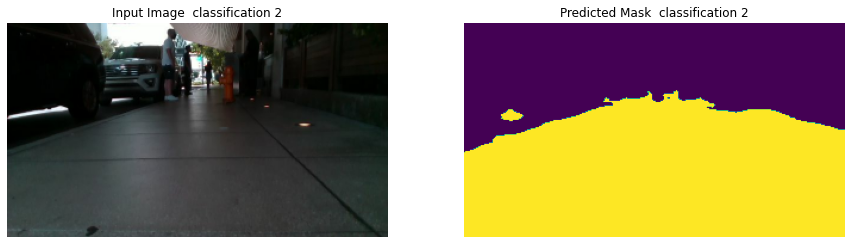

2/2 [==============================] - 1s 725ms/step


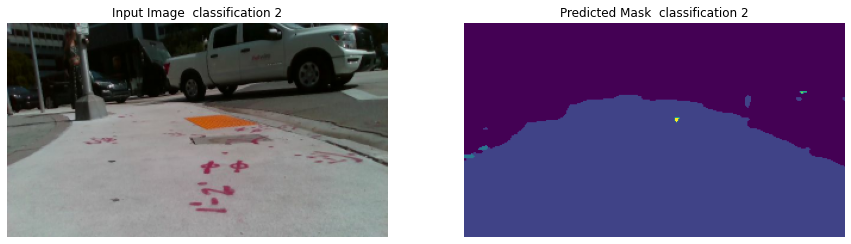

In [15]:
show_predictions(test_batches,30)